# 6.4 Supervised Machine Learning (Regression)

## This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that created graphs are displayed without the need to "call" them.

%matplotlib inline

In [3]:
# Set directory path

path= r'C:\Users\hachl\Downloads\OpenProject'

In [4]:
# Import the project data

df = pd.read_csv(os.path.join(path,'DataWHR_Merged.csv'))
df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


### 2. Data cleaning

In [5]:
df.shape

(2336, 11)

In [6]:
# Rename the columns to simpler syntax

df.rename(columns = {'Country name' : 'country', 'Year': 'year', 'Life Ladder' : 'happiness_rate', 'Log GDP per capita' : 'GDP', 'Social support': 'social_support', 'Healthy life expectancy at birth': 'life_expectancy', 'Freedom to make life choices':'freedom_of_choice', 'Generosity':'charity', 'Perceptions of corruption':'perceived_corruption', 'Positive affect':'positive_emotions', 'Negative affect':'negative_emotions'}, inplace = True)

In [7]:
df.columns

Index(['country', 'year', 'happiness_rate', 'GDP', 'social_support',
       'life_expectancy', 'freedom_of_choice', 'charity',
       'perceived_corruption', 'positive_emotions', 'negative_emotions'],
      dtype='object')

In [8]:
# Check for missing values

df.isnull().sum() # No missing values found

country                 0
year                    0
happiness_rate          0
GDP                     0
social_support          0
life_expectancy         0
freedom_of_choice       0
charity                 0
perceived_corruption    0
positive_emotions       0
negative_emotions       0
dtype: int64

In [9]:
# Check for duplicates

dups = df.duplicated()

In [10]:
dups.shape # df rows are unique

(2336,)

In [11]:
# Check basic stats

df.describe()

,year,happiness_rate,GDP,social_support,life_expectancy,freedom_of_choice,charity,perceived_corruption,positive_emotions,negative_emotions
count,2336.000000,2336.00000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,2014.679795,5.48278,9.393283,0.809997,63.392485,0.750169,0.001399,0.744036,0.652299,0.271590
std,5.027398,1.12622,1.151513,0.121119,6.767231,0.137951,0.157512,0.180660,0.104719,0.085663
min,2005.000000,1.28100,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2011.000000,4.64700,8.507000,0.746000,59.495000,0.661000,-0.106000,0.696750,0.573000,0.209000
50%,2015.000000,5.43900,9.495500,0.834000,64.950000,0.770000,-0.014000,0.790500,0.662000,0.262000
75%,2019.000000,6.31450,10.371500,0.905000,68.442500,0.859000,0.090000,0.864250,0.736000,0.322000
max,2023.000000,8.01900,11.664000,0.987000,77.280000,0.985000,0.703000,0.983000,0.884000,0.705000


#### There might be outlier that need to be removed, but i´ll go ahead feeding the machine the whole data set to reflect reality as much as possible.

## 3. Data prep for regression analysis

Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test:
As previously stated, my analysis will focus on the 3 variables that have the strongest correlations to happiness:
GDP per capita, Social Support, and Healthy life expectancy at birth.




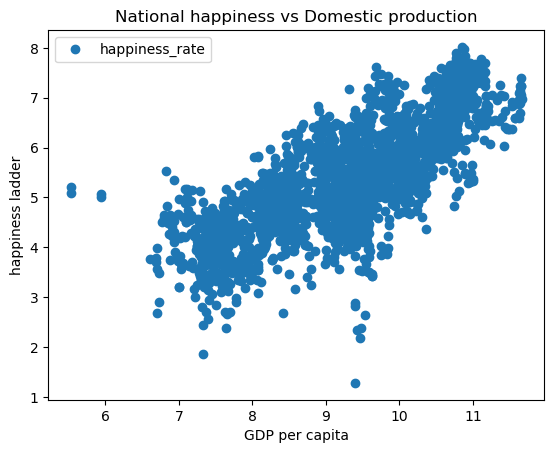

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP', y='happiness_rate', style='o')
plt.title('National happiness vs Domestic production')  
plt.xlabel('GDP per capita')  
plt.ylabel('happiness ladder')  
plt.show()

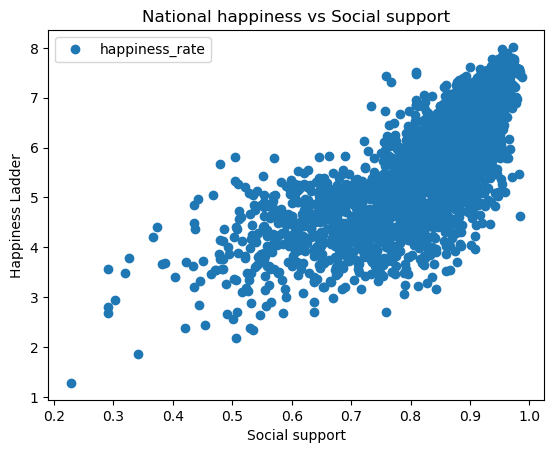

In [13]:
df.plot(x = 'social_support', y='happiness_rate', style='o')
plt.title('National happiness vs Social support')  
plt.xlabel('Social support')  
plt.ylabel('Happiness Ladder')  
plt.show()

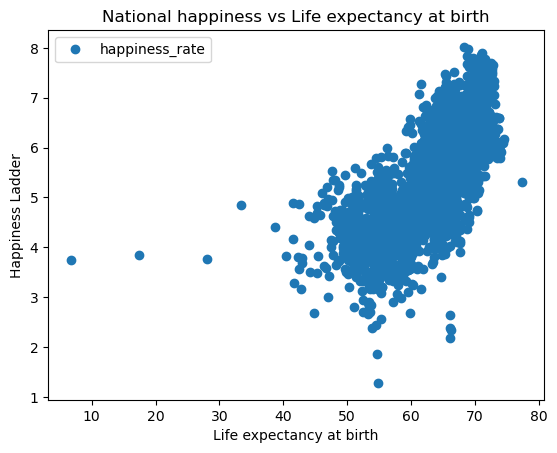

In [14]:
df.plot(x = 'life_expectancy', y='happiness_rate', style='o')
plt.title('National happiness vs Life expectancy at birth')  
plt.xlabel('Life expectancy at birth')  
plt.ylabel('Happiness Ladder')  
plt.show()

It´s important to keep in mind that 'year' variable is not included in the analysis yet, the df contains reports from all countries between 2005 and 2023. For further analysis, we could use the average values per each country in order to have one data point per country. However that comes with short comings as well, some countries have only one row in the data set while others have rows for all mentioned years.


#### Hypothesis: 'the more social support individuals have, the happier they are'.

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['social_support'].values.reshape(-1,1)
y = df['happiness_rate'].values.reshape(-1,1)

In [16]:
X

array([[0.451],
       [0.552],
       [0.539],
       ...,
       [0.555],
       [0.53 ],
       [0.341]])

In [17]:
y

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

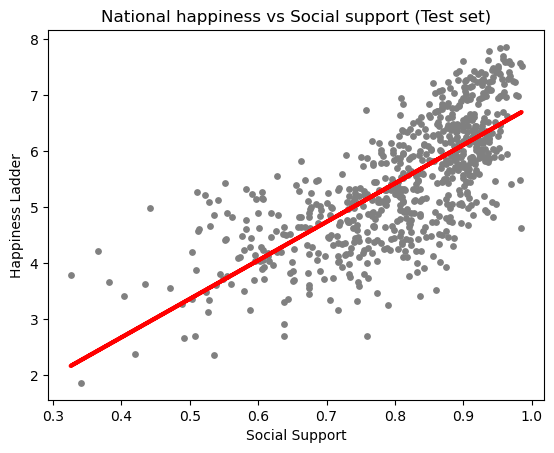

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('National happiness vs Social support (Test set)')
plot_test.xlabel('Social Support')
plot_test.ylabel('Happiness Ladder')
plot_test.show()

#### Regression model insights:  the red line shows the positive correlation between the variables but it doesn’t perfectly cover all of the data points. We can see many data points that indicate mid-high social support and low happiness rate, which contradicts my hypothesis. In order to check the accuracy of the model, we need to carry further checks.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.87715676]]
Mean squared error:  0.5989296573715027
R2 score:  0.5086872632056796


#### Statistical interpretation: 
- The slope coefficient indicates a positive relationship (as X rises, so does y). So as social support rises (social support), the happiness rate rises at a degree of 6.8772.
- The root mean squared error (MSE) is an accuracy estimator that tells us how close a regression line is to a set of points. A small MSE, like in this case, means that the regression line passes fairly close to the observations, making it a good fit.
- R2 score tells us how well the model explains the variance in the data. Its value is about halfway between 0 and 1, indicating a 50.87% fit.
- These results are not conclusive.

In [25]:
y_predicted

array([[6.15126748],
       [5.9724614 ],
       [6.23379336],
       [3.15970429],
       [6.44698522],
       [5.91744415],
       [5.33288582],
       [6.05498728],
       [6.34382786],
       [6.2269162 ],
       [5.30537719],
       [5.47730611],
       [4.96151936],
       [5.69049797],
       [5.87618121],
       [2.69893478],
       [6.53638825],
       [5.54607768],
       [5.47730611],
       [6.26817914],
       [5.25035994],
       [5.93807562],
       [4.76895897],
       [5.33288582],
       [6.08937306],
       [5.80740964],
       [6.28193345],
       [5.9724614 ],
       [5.65611219],
       [4.17752349],
       [6.04811012],
       [4.56264426],
       [4.79646759],
       [4.56952142],
       [5.09906249],
       [5.9724614 ],
       [6.04123297],
       [6.33695071],
       [2.16251656],
       [5.98621571],
       [5.87618121],
       [4.57639858],
       [4.89274779],
       [5.05092239],
       [5.64235788],
       [3.84054281],
       [6.06874159],
       [6.061

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.683,6.151267
1,5.959,5.972461
2,6.011,6.233793
3,3.545,3.159704
4,6.665,6.446985
5,5.503,5.917444
6,5.777,5.332886
7,5.653,6.054987
8,6.702,6.343828
9,5.821,6.226916


By comparing the actual values from the predicted values on this table, we can see that some values vary by the tenths while others vary greatly. It seems that the model is not the best fit and not too far off.

#### Compare how the regression fits the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.87715676]]
Mean squared error:  0.599926364848644
R2 score:  0.5342749645061906


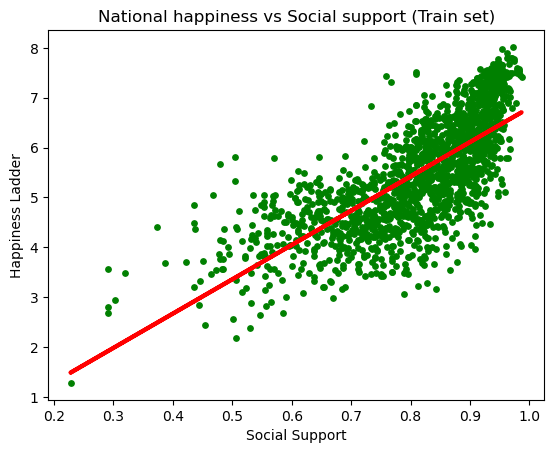

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('National happiness vs Social support (Train set)')
plot_test.xlabel('Social Support')
plot_test.ylabel('Happiness Ladder')
plot_test.show()

#### Conclusions: 
- R2 score is slightly higher on the Train set than the Test one, meaning the our model fits the training set only slightly better than the test set. So there is no overfitting.
- The data set might not be big enough to create an accurate model. Also the outliers might be sweking the data and hindering the performance of our model.
- Realistically speaking, happiness rate cannot be influenced only by one variable - a multiple regression model might be better fitting.
- We can also rule out our initial hypothesis 'the more social support individuals have, the happier they are', as it´s only partially true. 